In [31]:
# Importing prerequisite library...
import time
start = time.time()

from bs4 import BeautifulSoup
import nltk
import requests
import re
from nltk.tokenize import RegexpTokenizer
import numpy as np
import string
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
stopword = nltk.corpus.stopwords.words('english')

response = requests.post("https://readnovelfull.com/ajax/chapter-archive?novelId=166")
soup=BeautifulSoup(response.content,"html.parser")
chs = []
anchor = soup.find_all('a')
for links in anchor:
    chs.append(links.get('href'))
# len(chapters)



stop_set = set(stopword)





In [32]:
# Using max Threadpool to work on multiple pages concurrently...

In [33]:
Novel = {}

import concurrent.futures

MAX_THREADS = 66




def Three(url):
    
    anchor = re.findall("\d+",url)[0]
    
    base="https://readnovelfull.com"
    
    con=requests.get(base+url)
    
    soup=BeautifulSoup(con.content,"html.parser")
    
    pp = soup.find_all('p')
    
    pp = pp[2:]
    
    hold = [] #Will hold all para
    
    sum_of_lett = [] # to sum total letters of all para
    
    sum_of_words = [] # to sum Total words in that para
    
    sum_of_phrase = [] # To be used to count frequency
    
    pcounts=[]
    
    tokenizer = RegexpTokenizer(r'\w+')
    
    
    
    for para in pp:
        
        text = para.text
        
#         print(text,'\n\n')
        
        text_no_punc = text.translate(str.maketrans('', '', string.punctuation))
        
#         print('TEXTNOPUNCT  ', text_no_punc)
        
        tokens = tokenizer.tokenize(para.get_text(strip=True))
        
        phrase_set = set(tokens)
        
        sum_of_phrase.append(list(phrase_set))
        
        sum_of_words.append(len(phrase_set))
        
        words_no_stop = phrase_set - stop_set
        
        para_lett_len = len(''.join(list(words_no_stop)))
        
        sum_of_lett.append(para_lett_len)
#         print('working till')
        
        hold.append(para.get_text(strip=True))
        
            
    Novel[int(anchor)] = [''.join(hold),sum_of_phrase, sum(sum_of_lett), sum(sum_of_words), len(pp) ]

    
    
    
    
def Two(urls):  
    with concurrent.futures.ThreadPoolExecutor(max_workers=MAX_THREADS) as executor:
        executor.map(Three, urls)

        
        
        
def One(urls):
    Two(urls)

    
    

    
One(chs)

In [34]:
Novel[117][0]

'He felt stifled within, but Bai Ming also knew that he was unable to refute Zhang Xuan\'s words.It was the basics to check the cauldron and flames of the cauldron before forging pills. Even apprentices were aware of it. His action of going straight to forging was clearly a huge mistake.Using the words in Zhang Xuan\'s previous world, if a person didn\'t buckle their seat belt, check the tires, and scan the surroundings before starting to drive, they couldn\'t refute anything if an accident occurred.Right now, that was the emotion Bai Ming was experiencing. Lectured by an apprentice apothecary in public, yet unable to refute anything at all. It was clear just by thinking of how stifled he was at this moment."Alright, now that I have touched on the cauldron and the flames, I shall talk about the fusing of the medicinal herbs!"Knowing that the other party would be unable to reply to his words, Zhang Xuan could not be bothered to continue interrogating him over those mistakes of his. Inst

In [35]:
# Total Letters...

In [36]:
def tot_letts(d):
    l = len(d)
    total_letters = 0
    for i in range(1, l+1):
        total_letters += d[i][2]
    return total_letters

In [37]:
Total_letters = tot_letts(Novel)
print('Total Letters :',Total_letters)

Total Letters : 16014549


In [38]:
# Total Words...

In [39]:
def tot_words(d):
    l = len(d)
    total_words = 0
    for i in range(1, l+1):
        total_words += d[i][3]
    return total_words

In [40]:
Total_words = tot_words(Novel)
print('Total words :',Total_words)

Total words : 4589886


In [41]:
# Total paragraphs...

In [42]:
def tot_para(d):
    l = len(d)
    total_para = 0
    for i in range(1, l+1):
        total_para += d[i][4]
    return total_para

In [43]:
Total_paras = tot_para(Novel)
print('Total Paragraphs :',Total_paras)

Total Paragraphs : 203402


In [44]:
# Average word length...

In [45]:
Avg_word_len =  Total_letters/Total_words
print('Average word length',Avg_word_len)

Average word length 3.489095153997289


In [46]:
# Average words per paragraphs...

In [47]:
Avg_words_per_para = Total_words/Total_paras
print('Average words per paragraphs :',Avg_words_per_para)

Average words per paragraphs : 22.56558932557202


In [48]:
# Average paragraph per chapter...

In [49]:
Avg_para_chap = Total_paras/len(Novel)
print('Average paragraph per chapter :',Avg_para_chap)

Average paragraph per chapter : 89.68342151675485


In [50]:
# function to filter...
def filts(d):
    allwords = []
    for i in range(1, len(d)+1):
        for j in d[i][1]:
            for k in j:
                if k not in stopword:
                    allwords.append(k.lower())
    return allwords

In [51]:
# All words...
allW =  filts(Novel)

In [52]:
# Most frequent words...
counts = Counter(allW)

df = pd.DataFrame(counts.items(),columns=['Names','Counts'])

df.sort_values('Counts',ascending=False).head(20)

,Names,Counts
22,zhang,45570
21,xuan,38846
44,would,27632
20,i,23165
117,even,22572
96,the,22109
538,master,21626
2,could,20737
48,one,16579
98,it,16246


In [53]:
# Words in first half not in second half...
setA =set()

setB =set()

tokenizer = RegexpTokenizer(r'\w+')

for i in range(1, len(Novel)+1):
    if i<= len(Novel)/2:
        filtered=tokenizer.tokenize(Novel[i][0])
        
        filtered = [j.lower() for j in filtered if not j.lower() in stopword]
        
        setA = set(filtered)
        
    else:
        
        filtered=tokenizer.tokenize(Novel[i][0])
        
        filtered = [j.lower() for j in filtered if not j.lower() in stopword]
        
        setB = set(filtered)

        
print(setA - setB)

{'sudden', 'injuries', 'turn', 'price', 'hunsheng', 'grandpa', 'treats', 'indeed', 'demons', 'pondered', 'deaths', 'become', 'consumption', 'latter', 'learning', 'un', 'mediate', 'survived', 'spot', 'realized', 'beast', 'coincidence', 'acknowledge', 'actually', 'attempted', 'assessed', 'physical', 'shi', 'stop', 'teachers', 'whole', 'helped', 'lowering', 'kicking', 'twitched', 'frightening', 'killed', 'subservient', 'cang', 'draw', 'appear', 'elder', 'encounter', 'big', 'give', 'innate', 'reached', 'sky', 'kick', 'xuanxuan', 'extremely', 'possessed', 'primordial', 'tempering', 'masters', 'arts', 'mankind', 'assaulted', 'pay', 'avenge', 'hostility', 'matters', 'discuss', 'defeat', 'sounded', 'arrogant', 'technique', 'cloak', 'personally', 'suspect', 'yang', 'significantly', 'benefactor', 'bottleneck', 'particularly', 'guardian', 'brief', 'fending', 'kicks', 'halt', 'awkwardness', 'way', 'rumored', 'lack', 'nature', 'considering', 'enter', 'exact', 'satisfy', 'inner', 'forgot', 'duo', 'e

In [54]:
# Extracting names of all characters...
names = [word for (word, pos) in nltk.pos_tag(allW) if pos == 'NNP']

In [55]:
names

['zhang',
 'xuan',
 'zhang',
 'zhang',
 'zhang',
 'zhang',
 'xuan',
 'xuan',
 'zhang',
 'xiong',
 'xuan',
 'zhang',
 'xiong',
 'kill',
 'zhang',
 'xiong',
 'zhang',
 'xiong',
 'xiong',
 'xiong',
 'zhang',
 'xiong',
 'zhang',
 'zhang',
 'xuan',
 'zhang',
 'zhang',
 'xiong',
 'zhang',
 'zhang',
 'zhao',
 'xun',
 'xuan',
 'xun',
 'zhang',
 'xuan',
 'zhang',
 'zhao',
 'zhang',
 'zhao',
 'xun',
 'zhang',
 'zhao',
 'zhao',
 'xuan',
 'zhang',
 'zhao',
 'zhao',
 'zhao',
 'ya',
 'zhao',
 'xuan',
 'zhang',
 'zhao',
 'xuan',
 'zhang',
 'xuan',
 'zhang',
 'zhao',
 'zhang',
 'xuan',
 'zhang',
 'zhao',
 'xuan',
 'zhang',
 'xuan',
 'zhang',
 'yao',
 'zhao',
 'zhao',
 'zhang',
 'xiao',
 'xiao',
 'xiao',
 'xiao',
 'xiao',
 'xiao',
 'xiao',
 'mo',
 'xiao',
 'xiao',
 'zhang',
 'yang',
 'xiao',
 'xiao',
 'xuan',
 'xiao',
 'zheng',
 'xuan',
 'zhang',
 'zheng',
 'zheng',
 'zheng',
 'xuan',
 'xiao',
 'zheng',
 'yang',
 'xuan',
 'zhang',
 'zheng',
 'xiao',
 'zheng',
 'zhao',
 'xuan',
 'zhang',
 'xuan',
 'zhan

In [56]:
# Most frequent characters...
df = pd.DataFrame(nltk.FreqDist(names).items(),columns=['Names','Counts'])
df = df.sort_values('Counts',ascending=False)
# df.iloc[0:100,]
df.head(10)

,Names,Counts
0,zhang,11477
1,xuan,5944
4,zhao,796
5,xun,666
8,xiao,472
138,xu,436
10,yang,412
14,zhenqi,332
37,xue,314
11,zheng,274


In [57]:
# The main character is clearly Zhang Xuan

# The characters closest to the main character are zhao and xun 

# Side Characters...
side_chars = df.iloc[6:, :]
print(list(side_chars.Names))

['yang', 'zhenqi', 'xue', 'zheng', 'xingmo', 'zongshi', 'xie', 'xiang', 'yu', 'kill', 'mo', 'saber', 'zhen', 'xiaofeng', 'xiaoxu', 'zhizun', 'zhu', 'xiong', 'xingmeng', 'xiaojie', 'xuansheng', 'zhan', 'knew', 'xuanjiang', 'zhuo', 'xiaoxiao', 'xiaochen', 'zhuang', 'xin', 'ya', 'ziyi', 'xi', 'zhui', 'kingdom', 'zhou', 'zhong', 'zhenyang', 'meet', 'xiaoyu', 'kang', '剑', 'xuanxuan', 'yue', 'zi', 'kick', 'kong', 'know', 'kui', 'xuanluo', 'yin', 'qiang', 'yunfeng', 'xuanyuan', 'blacksaber', 'yao', 'knowledge', 'shi', 'mu', 'xiangyun', 'zhe', 'yun', '_', 'jiang', 'mouth', 'xinru', 'xing', 'middle', 'zither', 'zizhen', 'knock', 'yes', 'xuanzi', 'tier', 'eyes', 'zhuoyang', 'ye', 'notice', '神', 'yaoyao', 'ziyan', 'sword', 'question', 'xiaowu', 'zhi', 'lord', 'yanzhi', 'zenith', 'kin', 'overboard', '正确', 'myriad', 'tao', '_神', 'yangzi', 'qin', 'yuanfeng', 'laoshi', '大', 'die', 'make', 'xinqiao', 'medicinal', 'forward', 'yuanwai', 'mortal', 'thousand', 'état', 'trust', 'kacha', 'emblem', '智', 'que

In [58]:
# Visualizing the imprtance based on frequency of mentions...

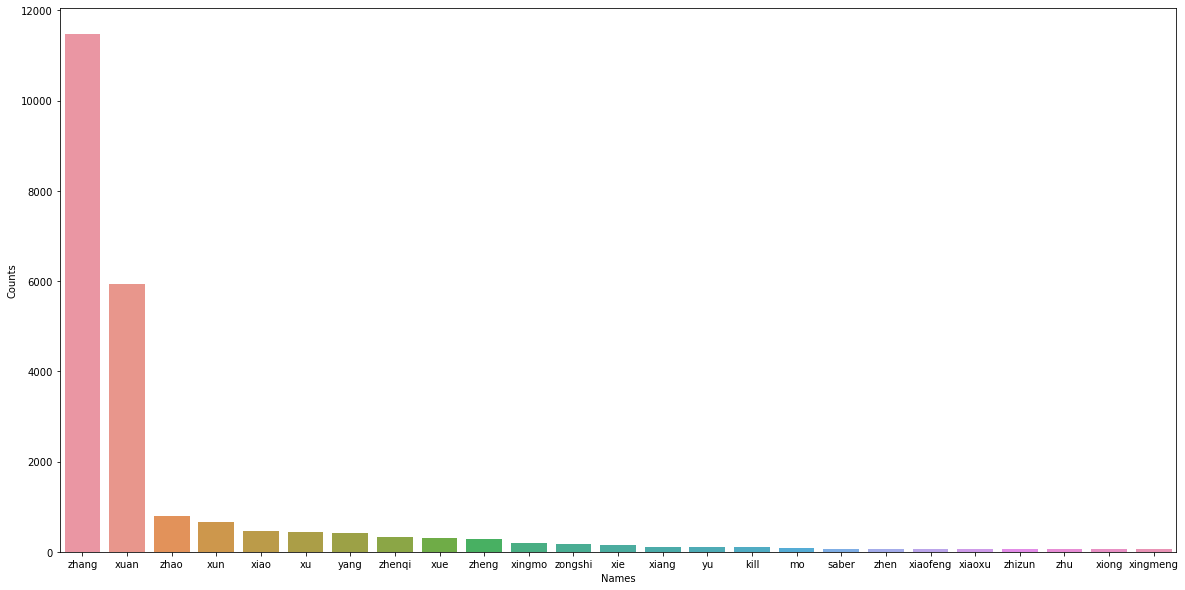

In [59]:
plt.figure(figsize=(20,10))
ax = sns.barplot(x="Names", y="Counts", data=df[0:25])

In [60]:
end = time.time()
print('Total time ', end-start, ' Seconds')

Total time  251.51226949691772  Seconds
